# 1/Read Data and some check

In [4]:
import pandas as pd

gt = pd.read_csv('ground_truth.csv')

m1 = pd.read_csv('predicted_value_1.csv')
m2 = pd.read_csv('predicted_value_2.csv')
m3 = pd.read_csv('predicted_value_3.csv')

print(gt.shape)


(315, 2)


In [14]:
def checkDuplicateID(df):
    l = list(df['order_id'])
    return len(l) == len(set(l))

print(checkDuplicateID(gt))
print(checkDuplicateID(m1))
print(checkDuplicateID(m2))
print(checkDuplicateID(m3))

True
True
True
True


In [17]:
# check if the order id is different

l0 = gt['order_id']
l1 = m1['order_id']
l2 = m2['order_id']
l3 = m3['order_id']

print((l0==l1).all())
print((l0==l2).all())
print((l0==l3).all())

True
True
True


# 2/ Visualize data

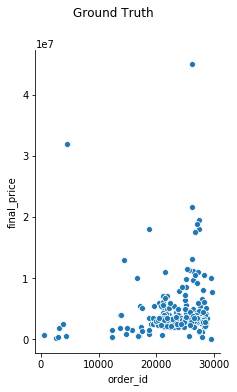

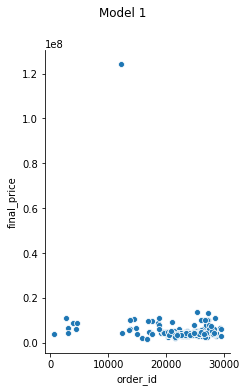

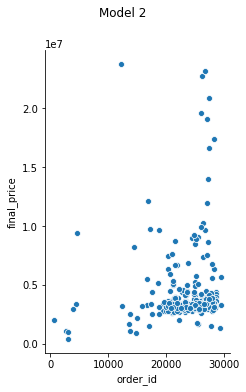

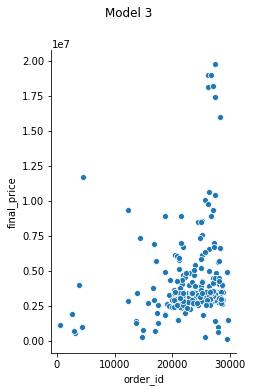

In [3]:
# visualize data
import seaborn as sns

ground = sns.pairplot(gt, x_vars='order_id', y_vars='final_price', size=5, aspect=0.7)
ground.fig.suptitle('Ground Truth', y =1.08)
ground.savefig('ground_truth.png')

model_1 = sns.pairplot(m1, x_vars='order_id', y_vars='final_price', size=5, aspect=0.7)
model_1.fig.suptitle('Model 1', y =1.08)
model_1.savefig('model_1.png')

model_2 = sns.pairplot(m2, x_vars='order_id', y_vars='final_price', size=5, aspect=0.7)
model_2.fig.suptitle('Model 2', y =1.08)
model_2.savefig('model_2.png')

model_3 = sns.pairplot(m3, x_vars='order_id', y_vars='final_price', size=5, aspect=0.7)
model_3.fig.suptitle('Model 3', y =1.08)
model_3.savefig('model_3.png')


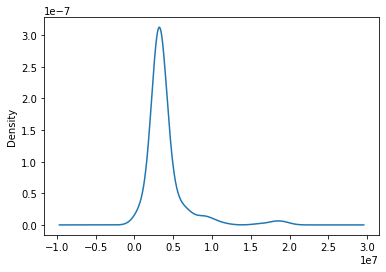

In [23]:
# fig1 = gt['final_price']
# fig1 = fig1.plot.kde()
# fig1 = fig1.get_figure()
# fig1.savefig('ground_truth_kde.png')

# fig2 = m1['final_price']
# fig2 = fig2.plot.kde()
# fig2 = fig2.get_figure()
# fig2.savefig('model1_kde.png')

# fig3 = m2['final_price']
# fig3 = fig3.plot.kde()
# fig3 = fig3.get_figure()
# fig3.savefig('model2_kde.png')

fig4 = m3['final_price']
fig4 = fig4.plot.kde()
fig4 = fig4.get_figure()
fig4.savefig('model3_kde.png')


# 3/ Metrics for validate both three models

Between ***MAE*** and ***RMSE***, I decide to choose ***RMSE*** because of:
* Giving a relatively high weight to large errors.
* More useful when large errors are particularly undesirable
RMSE equation:

$RMSE = \sqrt{\frac {1}{n} \sum_{j=1}^{n} (y_i- \hat{y_i})^2}$
*	$n$ : The number of samples that we calculated
*	$y_i$ : The prediction result from model with the sample number is j
*	$\hat{y_i}$ : The truth result of that sample. 


In [25]:
# Take final price in data

price_gt = gt['final_price']
price_m1 = m1['final_price']
price_m2 = m2['final_price']
price_m3 = m3['final_price']


In [45]:
# find different between ground truth and other model results

diff_gt_m1 = price_gt - price_m1
diff_gt_m2 = price_gt - price_m2
diff_gt_m3 = price_gt - price_m3

# take variable 'n'

n = diff_gt_m1.shape[0]


315


In [37]:
'''
Apply RMSE equation into code
'''
import numpy as np

RMSE_1 = np.sqrt((1/n)*np.sum((np.array(diff_gt_m1))**2))
RMSE_2 = np.sqrt((1/n)*np.sum((np.array(diff_gt_m2))**2))
RMSE_3 = np.sqrt((1/n)*np.sum((np.array(diff_gt_m3))**2))

print('The RMSE of model 1 is: {}'.format(round(RMSE_1)))
print('The RMSE of model 2 is: {}'.format(round(RMSE_2)))
print('The RMSE of model 3 is: {}'.format(round(RMSE_3)))


The RMSE of model 1 is: 7898391.0
The RMSE of model 2 is: 2886121.0
The RMSE of model 3 is: 2460703.0
